In [ ]:
#install and import packages
!pip install simpletransformers

# Loading data

In [ ]:
#load data

import pandas as pd
df = pd.read_csv("https://github.com/P4CSS/PSS/raw/master/data/sentiment.csv")
df.columns


Index(['tag', 'text'], dtype='object')

# Modeling
- [Text classification using simpletransformer](https://analyticsindiamag.com/text-classification-using-simple-transformers/)

## Train-test splitting

This `stratify` parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter `stratify`.

For example, if variable `y` is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, `stratify=y` will make sure that your random split has 25% of 0's and 75% of 1's.

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df.rename(columns = {"tag":"label"})[["text", "label"]].replace({"N":-1, "P": 1}), 
                               test_size=0.3, 
                               stratify=df['tag'])
train

,text,label
427,扯淡，智商不健全才是硬傷！蒙牛都那樣了，還不是一樣有人買！,-1
4562,在前臺不能刷卡預授權，有點不方便。搞不懂，為什麼可以刷卡消費，卻不能刷預授權？,-1
4943,我也喜歡蒙牛的牛奶,1
6058,1.寬屏真是看著很難受，誰發明的寬屏呀 2.電池好像待機短點，第一次充滿我的只能顯示待2小時,-1
5401,本部手機我覺得有很多缺點，例如會自動關機，反映遲鈍，功能少，總之我現在就想把她扔了最好！！,-1
...,...,...
4210,"好,史上最好的國產手機!!!支援國貨,振興中華!!!!!",1
3884,中糧控股蒙牛後，我可能會對蒙牛增加一些好感。,1
5201,驅動不好找。自帶的驅動盤很多用不上的東西。要是有聯想那樣一鍵安裝驅動就太好了。,-1
5777,外觀時尚，配置還行。東京送貨很快我10號下午定的貨還是分期付款的，結果11號上午就送貨了。,1


In [ ]:
#train test split
# from sklearn.model_selection import train_test_split
# import random
# index = [i for i in range(len(cleaned))]
# random.shuffle(index)
# n = round(len(index)*.67)
# train = index[:n]
# test = index[n:]
# train.sort()
# test.sort()
# train_df = cleaned.iloc[train][['text', 'label']]
# test_df = cleaned.iloc[test][['text', 'label']]
# train_df.columns = ["text", "label"]
# test_df.columns = ["text", "label"]

## Model training

In [ ]:
#train model: binary classification
from simpletransformers.classification import ClassificationModel, ClassificationArgs
# from simpletransformers.classification import MultiLabelClassificationModel, MultiLabelClassificationArgs

model_args = ClassificationArgs()
model_args.labels_list = [1, -1]
model_args.num_train_epochs = 10
model_args.early_stopping_consider3_epochs = True
model_args.use_early_stopping = True
model_args.overwrite_output_dir = True


In [ ]:
model = ClassificationModel('bert', 'bert-base-chinese', args = model_args)
model.train_model(train)

Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

  0%|          | 0/4471 [00:00<?, ?it/s]

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 0 of 10:   0%|          | 0/559 [00:00<?, ?it/s]

Running Epoch 1 of 10:   0%|          | 0/559 [00:00<?, ?it/s]

Running Epoch 2 of 10:   0%|          | 0/559 [00:00<?, ?it/s]

Running Epoch 3 of 10:   0%|          | 0/559 [00:00<?, ?it/s]

Running Epoch 4 of 10:   0%|          | 0/559 [00:00<?, ?it/s]

Running Epoch 5 of 10:   0%|          | 0/559 [00:00<?, ?it/s]

Running Epoch 6 of 10:   0%|          | 0/559 [00:00<?, ?it/s]

Running Epoch 7 of 10:   0%|          | 0/559 [00:00<?, ?it/s]

Running Epoch 8 of 10:   0%|          | 0/559 [00:00<?, ?it/s]

Running Epoch 9 of 10:   0%|          | 0/559 [00:00<?, ?it/s]

(5590, 0.09492949474033593)

In [ ]:
# model = ClassificationModel("bert", "saved_model/model_proUS_comment_classification")

## Evaluation

In [ ]:
test.groupby('label').count()

,text
label,
-1,1004
1,913


In [ ]:
# model.eval_model(test_df)
result, model_outputs, wrong_predictions = model.eval_model(test)
result

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1384: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/1917 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/240 [00:00<?, ?it/s]

{'auprc': 0.9814683022766035,
 'auroc': 0.979597491741686,
 'eval_loss': 0.575509527980796,
 'fn': 62,
 'fp': 65,
 'mcc': 0.8671865470305603,
 'tn': 848,
 'tp': 942}

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='micro')
result2, model_outputs, wrong_predictions = model.eval_model(test, f1=f1_multiclass, acc=accuracy_score)
result2

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1384: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/1917 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/240 [00:00<?, ?it/s]

{'acc': 0.9337506520605112,
 'auprc': 0.9814683022766035,
 'auroc': 0.979597491741686,
 'eval_loss': 0.575509527980796,
 'f1': 0.9337506520605112,
 'fn': 62,
 'fp': 65,
 'mcc': 0.8671865470305603,
 'tn': 848,
 'tp': 942}

## Prediction

In [ ]:
# Prediction testing
predictions, raw_outputs = model.predict(["這條大黃瓜真是美"])
print(predictions, raw_outputs)
# ([1], array([[ 5.1875 , -6.09375]]))

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[1] [[ 5.94140625 -5.44140625]]


In [ ]:
predictions, raw_outputs = model.predict(["這條大黃瓜真是醜斃了"])
predictions, raw_outputs

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

([-1], array([[-5.91796875,  5.39453125]]))

## Predicting test set
Pridicting test set data to compare original label and predicted label.

In [ ]:
predict = model.predict(test['text'].tolist())
test['predict'] = predict[0]
test['correct'] = test['label']*test['predict']

  0%|          | 0/1917 [00:00<?, ?it/s]

  0%|          | 0/240 [00:00<?, ?it/s]

In [ ]:
test

,text,label,predict,correct
1158,顯示卡真是不行，看rmvb電影時如果有其他操作 畫面也會卡一下，不過畢竟是上網本，可以容忍,-1,-1,1
187,書的裝訂 很不好 一開啟就開始掉頁了從文學的角度看 胡很有文采從情感出發 想砸雞蛋,-1,-1,1
5839,服務很好，環境也不錯，很舒服，餐廳也很舒服，很溫馨。,1,1,1
6002,外殼做工有點茶，有些地方有毛邊，出現一次花屏，不知道會不會再出現,-1,-1,1
4929,蒙牛丟人了…,-1,-1,1
...,...,...,...,...
1628,貴公司14號發出，為什麼到今天還沒收到呢？今天已經是26號了.12天了，還沒收到書。,-1,-1,1
1,這樣的配置用Vista系統還是有點卡。 指紋收集器。 沒送原裝滑鼠還需要自己買，不太好。,-1,-1,1
3022,太喜歡了，外觀漂亮，紅棕相配的每一處細節都很完美！效能完全能滿足我的遊戲需求。,1,1,1
3842,衝著文筆去的，也只有文筆而已一個懦弱無恥的男人的辯白,-1,-1,1


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(test['label'], test['predict'])
cr = classification_report(test['label'], test['predict'])
accuracy = accuracy_score(test['label'], test['predict'])
print(accuracy)
print(cr)
print(cm)

0.9337506520605112
              precision    recall  f1-score   support

          -1       0.94      0.94      0.94      1004
           1       0.93      0.93      0.93       913

    accuracy                           0.93      1917
   macro avg       0.93      0.93      0.93      1917
weighted avg       0.93      0.93      0.93      1917

[[942  62]
 [ 65 848]]


In [ ]:
for row in test[test.correct == -1].to_dict('records'):
    # print(raw)
    print('[%3s,%3s] %s'%(row['label'], row['predict'], row['text']))

[  1, -1] 為何沒有蒙牛？
[ -1,  1] 東西和美的售後都很不錯。唯一不太好的就是耗電量很大哦，一天24小時開著大約耗電11度，而且熱的慢
[ -1,  1] 第二冊有第一冊的重影，佔到本冊的一半，希望能夠調貨。
[ -1,  1] 我也在大美資公司，看看拉拉，我很慶幸我們公司沒有這些爭鬥。
[ -1,  1] 每天中午一袋兒蒙牛早餐奶，嗯沒錯，是早餐奶；也沒錯，是蒙牛！
[ -1,  1] 很簡單，比較適合1歲內寶寶，紙也不厚，建議這種簡單的可以做小一點，方便寶寶拿取。
[  1, -1] 嗯嗯，寫過了，除了部分材料不太好買，真的是本不錯的書。
[  1, -1] 用的還可以，可惜不能幫忙裝記憶體條。而且我同學的第二個盤雙擊就可以備份，我的不行
[  1, -1] 發現了不少錯別字……也許是新換的輸入法不太適應，也許是心情過於激動自我反省中……
[ -1,  1] 把美祿和蒙牛早餐奶加一起，於是有了很詭異的味道。
[ -1,  1] 外觀：鋼琴烤漆，不耐髒。效能：沒什麼特別感受（XP）送禮包“都很好，除了少了個鍵盤保護膜之類的。
[  1, -1] 感覺比1000H那款好多了，3099買的，有點後悔，應該買帶系統的哦
[ -1,  1] 一到晚上生意就非常的好，這麼破的酒店還能吸引人的原因是因為價格還算便宜。
[ -1,  1] 蒙牛地溝奶的黃麴黴菌毒素超標很多！，容易致癌我宿舍還三瓶1L的 良心企業
[ -1,  1] 還以為有炫燈的，哪知道沒有，有什麼問題直接客服吧，kfmm還是挺有禮貌的
[ -1,  1] 硬體設施還可以，服務很‘好’ ，一個晚上竟然打了好幾個電話上來問需不需要小姐服務。。。。。。
[ -1,  1] 新蒙牛新變化，換湯不換藥，加料不加價~
[ -1,  1] 總結一下，女人要現實。要麼嫁好老公，要麼抓住機遇有事業……這還用她說啊。
[  1, -1] 再次抱歉，我的意思是的第一條評論有錯別字，暈
[  1, -1] 不過確實要指出的是，我對“大叔”這個稱呼很雷...T_T
[ -1,  1] 買了一本,字是大大的,不覺得有啥好的暈
[ -1,  1] 服務還可以！別的和招待所水平差不多。網路經常不好！不值得推薦！
[  1, -1] 爸爸不在家的時候，小朋友對我說：“媽媽，今天你當爸爸好不好？”
[  1, -1] 房間的隔

In [ ]:
test['correct'].value_counts()

 1    1790
-1     127
Name: correct, dtype: int64

# Representation: Document vectorization
- [SentenceTransformer](https://www.sbert.net/)
- [Text Rerpesentation Examples](https://simpletransformers.ai/docs/text-rep-examples/)

In [ ]:
from simpletransformers.language_representation import RepresentationModel
from simpletransformers.config.model_args import ModelArgs

model_args = ModelArgs(max_seq_length=156)
model = RepresentationModel('bert', 'bert-base-chinese', 
                            args=model_args, 
                            use_cuda=False)

Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertForTextRepresentation: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForTextRepresentation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTextRepresentation from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
list(df['text'])[:3]

['店家很給力，快遞也是相當快，第三次光顧啦',
 '這樣的配置用Vista系統還是有點卡。 指紋收集器。 沒送原裝滑鼠還需要自己買，不太好。',
 '不錯，在同等檔次酒店中應該是值得推薦的！']

In [ ]:
# Covert word vectors to sentence vectors by the mean of word vectors
embeddings = model.encode_sentences(df['text'], combine_strategy="mean")
print(embeddings.shape)

(6388, 768)


# Clustering
https://towardsdatascience.com/topic-modeling-with-bert-779f7db187e6

## Dimension Reduction
Reduce to 5 dimension

In [ ]:
!pip install umap-learn
import umap
umap_embeddings = umap.UMAP(n_neighbors=15, 
                            n_components=5, 
                            metric='cosine').fit_transform(embeddings)

## Clutering by hdbscan
[How hdbscan work?](https://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html)

In [ ]:
!pip install hdbscan
import hdbscan
cluster = hdbscan.HDBSCAN(min_cluster_size=15,
                          metric='euclidean',                      
                          cluster_selection_method='eom').fit(umap_embeddings)

In [ ]:
from collections import Counter
df['cluster'] = list(cluster.labels_)
print(df.columns)
print(Counter(df['cluster']))

Index(['tag', 'text', 'cluster'], dtype='object')
Counter({3: 3111, 2: 1376, 0: 858, 6: 812, 5: 88, -1: 71, 4: 50, 1: 22})


In [ ]:
df

,tag,text,cluster
0,P,店家很給力，快遞也是相當快，第三次光顧啦,3
1,N,這樣的配置用Vista系統還是有點卡。 指紋收集器。 沒送原裝滑鼠還需要自己買，不太好。,3
2,P,不錯，在同等檔次酒店中應該是值得推薦的！,0
3,N,哎！ 不會是蒙牛乾的吧 嚴懲真凶！,2
4,N,空尤其是三立電視臺女主播做的序尤其無趣像是硬湊那麼多字,6
...,...,...,...
6383,P,價效比高、記憶體大、功能全，螢幕超清晰,3
6384,N,你太狠了… 告訴你他們不會喧譁的人，肯定是蒙牛喝多了,2
6385,N,醫生居然買了蒙牛，我是喝呢還是不喝呢還是不喝呢？,2
6386,N,我只想說 夾蒙牛是不對的 販賣毒品是犯罪行為,2


## Plotting
- Before plotting, reduce original embeddings to 2-dimension

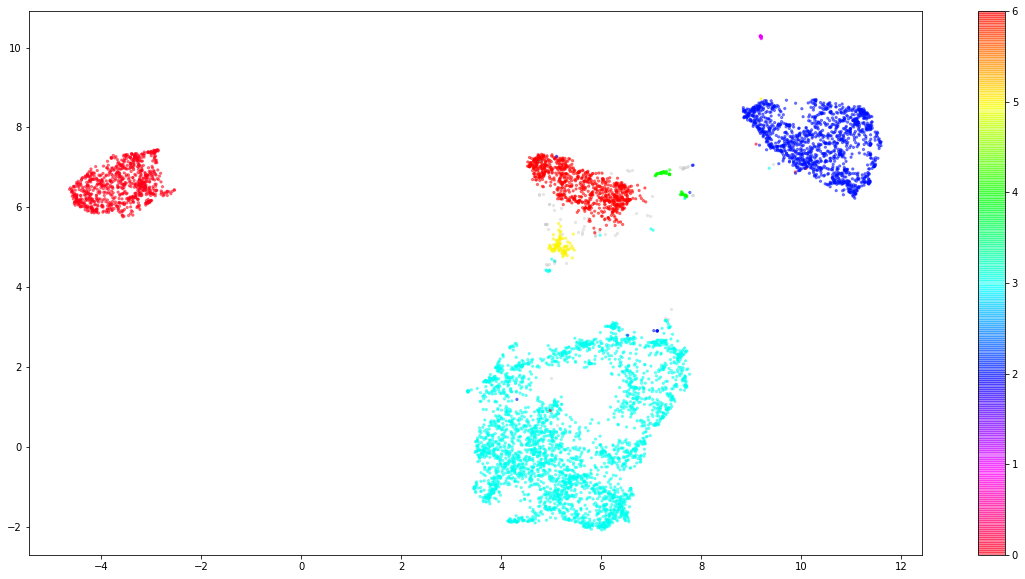

In [ ]:
import matplotlib.pyplot as plt

# Prepare data
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=5, alpha=0.3)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=5, alpha=0.5, cmap='hsv_r')
plt.colorbar()

## Exploring cluster keywords


In [ ]:
# from transformers import (
#    BertTokenizerFast,
#    AutoModelForMaskedLM,
#    AutoModelForCausalLM,
#    AutoModelForTokenClassification,
# )

# # masked language model (ALBERT, BERT)
# tokenizer = BertTokenizerFast.from_pretrained('bert-base-chinese')
# model = AutoModelForMaskedLM.from_pretrained('ckiplab/albert-tiny-chinese') # or other models above


In [ ]:
!pip install hanziconv
from hanziconv import HanziConv
import jieba
df['tokenized'] = [list(jieba.cut(text)) for text in df['text']]

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.668 seconds.
Prefix dict has been built successfully.


In [ ]:
import unicodedata # for removing Chinese puctuation
!wget https://github.com/P4CSS/PSS/raw/master/data/stopwords_zh-tw.txt -O stopwords_zh-tw.txt
def remove_stopWords(words):
    with open("stopwords_zh-tw.txt", encoding="utf-8") as fin:
        stopwords = fin.read().split("\n")[1:]
    out = []
    for word in words:
        if word not in stopwords:
            out.append(word)
    return out
def remove_punc_by_unicode(words):
    out = []
    for word in words:
        if word != " " and not unicodedata.category(word[0]).startswith('P'):
            out.append(word)
    return out
df['cleaned'] = df['tokenized'].apply(remove_punc_by_unicode).apply(remove_stopWords)

--2021-06-05 10:54:51--  https://github.com/P4CSS/PSS/raw/master/data/stopwords_zh-tw.txt
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/P4CSS/PSS/master/data/stopwords_zh-tw.txt [following]
--2021-06-05 10:54:52--  https://raw.githubusercontent.com/P4CSS/PSS/master/data/stopwords_zh-tw.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8125 (7.9K) [text/plain]
Saving to: ‘stopwords_zh-tw.txt’

stopwords_zh-tw.txt 100%[===================>]   7.93K  --.-KB/s    in 0s      

2021-06-05 10:54:52 (67.7 MB/s) - ‘stopwords_zh-tw.txt’ saved [8125/8125]



In [ ]:
from collections import defaultdict, Counter
clu_counter = Counter(df['cluster'])
cdict = defaultdict(Counter)
for k, v in zip(df['cluster'], df['cleaned']):
    for word in v:
        cdict[k][word] += 1
for c in cdict:
    print("-"*80)
    print("Cluster", c, "has", clu_counter[c], "members")
    print(cdict[c].most_common(20))
    

--------------------------------------------------------------------------------
Cluster 3 has 3111 members
[('好', 761), ('不錯', 617), ('買', 309), ('外觀', 286), ('系統', 272), ('螢幕', 258), ('價效', 217), ('功能', 217), ('說', 208), ('配置', 201), ('鍵盤', 184), ('價格', 178), ('速度', 175), ('有點', 170), ('時間', 163), ('電池', 160), ('XP', 157), ('驅動', 155), ('感覺', 150), ('高', 149)]
--------------------------------------------------------------------------------
Cluster 0 has 858 members
[('酒店', 383), ('房間', 361), ('不錯', 223), ('好', 213), ('服務', 149), ('住', 122), ('方便', 119), ('早餐', 109), ('環境', 109), ('設施', 107), ('感覺', 87), ('價格', 83), ('差', 79), ('入住', 77), ('比較', 72), ('位置', 65), ('交通', 63), ('舊', 63), ('說', 59), ('下次', 57)]
--------------------------------------------------------------------------------
Cluster 2 has 1376 members
[('蒙牛', 1515), ('喝', 309), ('抵制', 136), ('伊利', 125), ('牛奶', 124), ('買', 103), ('好', 91), ('喜歡', 77), ('酸奶', 53), ('說', 50), ('太', 46), ('好喝', 45), ('支援', 44), ('吃', 43), ('牛'

In [ ]:
# download 
!wget https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip

# unzip
!unzip "NotoSansCJKtc-hinted.zip"
import matplotlib as mpl

# choose a font style and move to your font library
!mv NotoSansCJKtc-Regular.otf /usr/share/fonts/truetype/

# add custom fonts to Matplotlib
font_path = "/usr/share/fonts/truetype/NotoSansCJKtc-Regular.otf"
mpl.font_manager.fontManager.addfont(font_path)
mpl.rc('font', family='Noto Sans CJK TC')
print(len(clu_counter))

--2021-06-05 10:55:44--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 142.250.81.208, 2607:f8b0:4004:82f::2010
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|142.250.81.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121247366 (116M) [application/zip]
Saving to: ‘NotoSansCJKtc-hinted.zip.2’

NotoSansCJKtc-hinte 100%[===================>] 115.63M   238MB/s    in 0.5s    

2021-06-05 10:55:45 (238 MB/s) - ‘NotoSansCJKtc-hinted.zip.2’ saved [121247366/121247366]

Archive:  NotoSansCJKtc-hinted.zip
replace LICENSE_OFL.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: LICENSE_OFL.txt         
  inflating: NotoSansCJKtc-Black.otf  
  inflating: NotoSansCJKtc-Bold.otf  
  inflating: NotoSansCJKtc-DemiLight.otf  
  inflating: NotoSansCJKtc-Light.otf  
  inflating: NotoSansCJKtc-Medium.otf  
 

ValueError: ignored

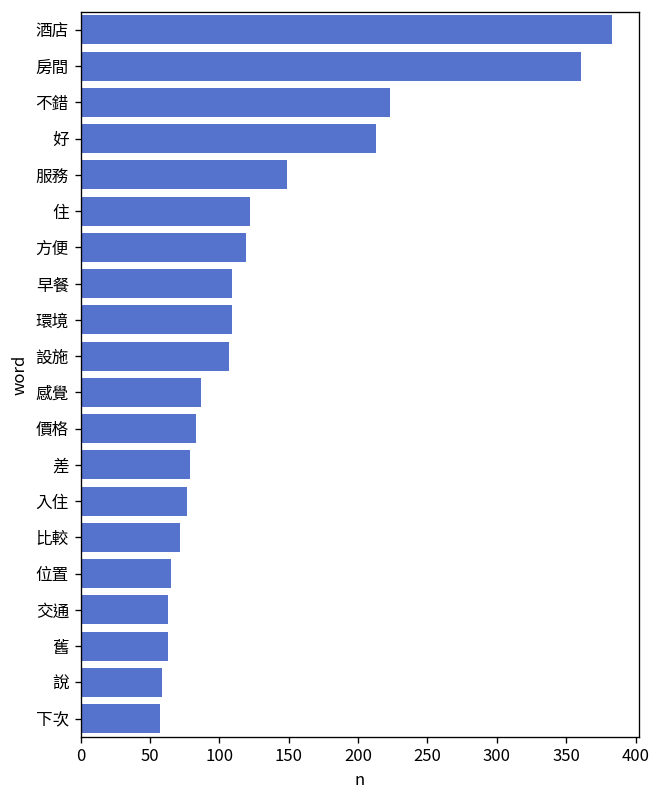

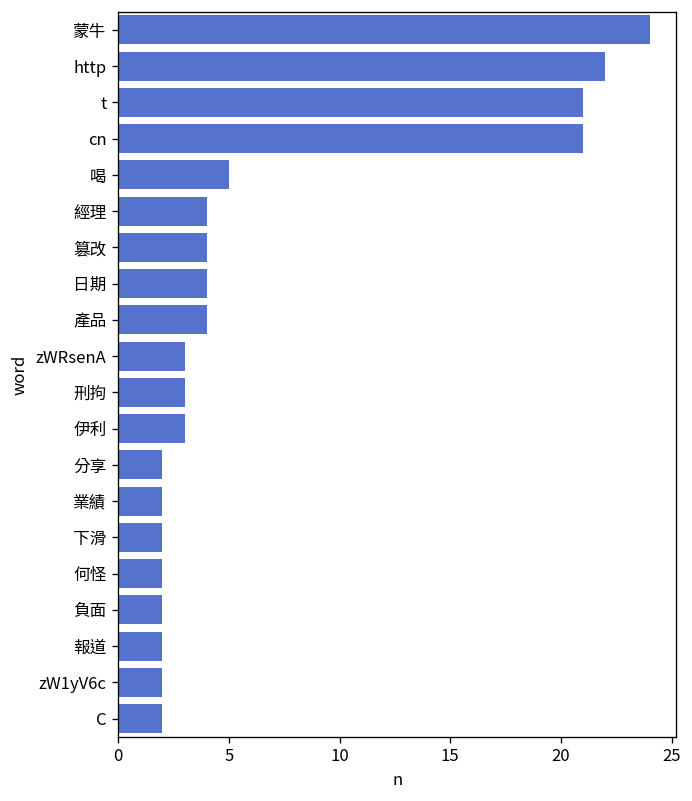

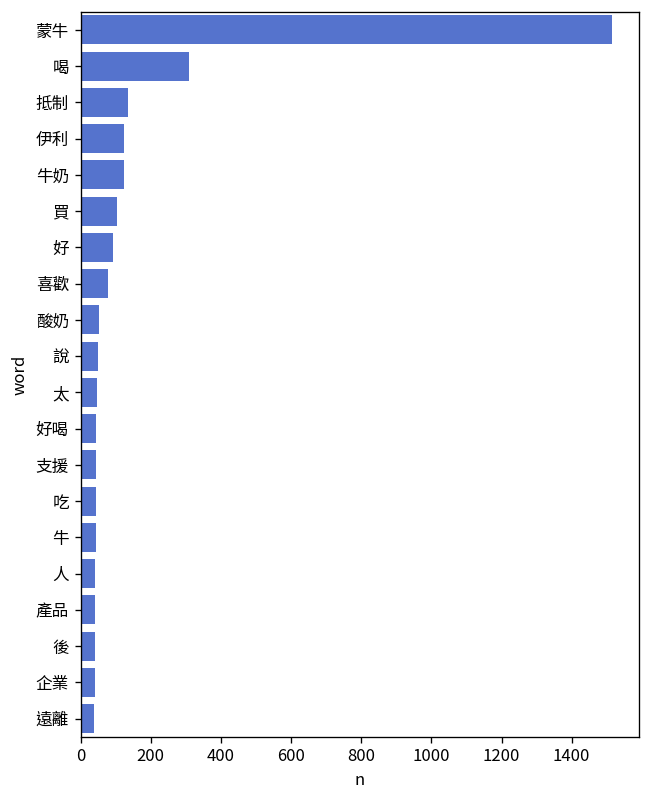

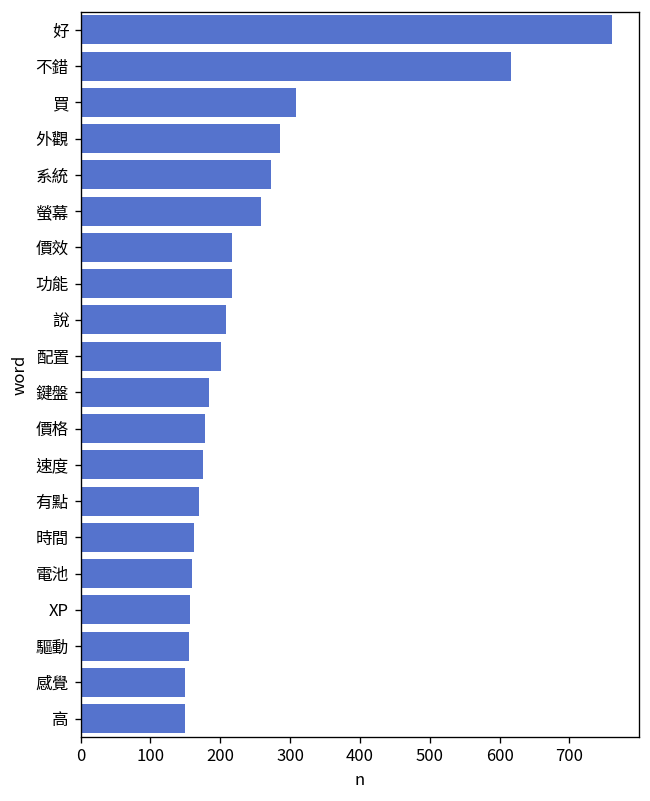

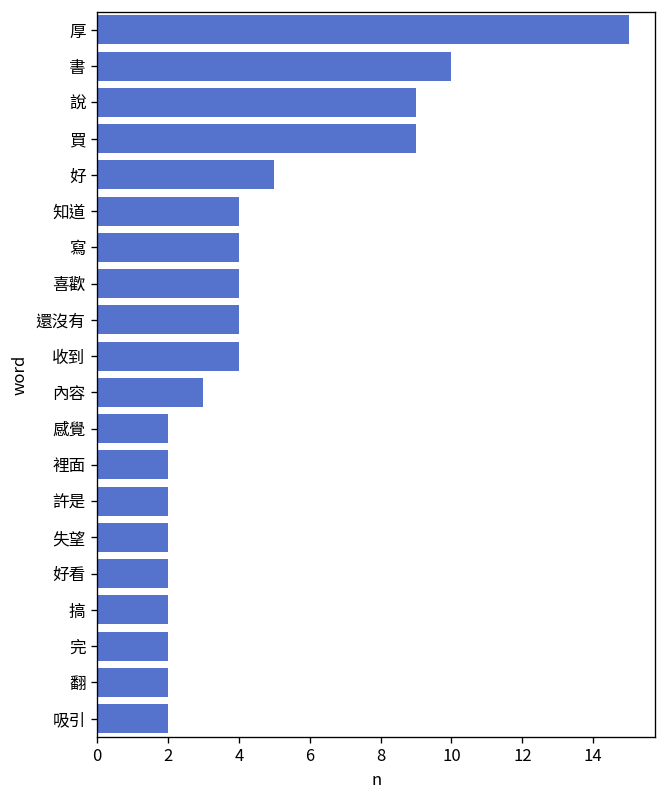

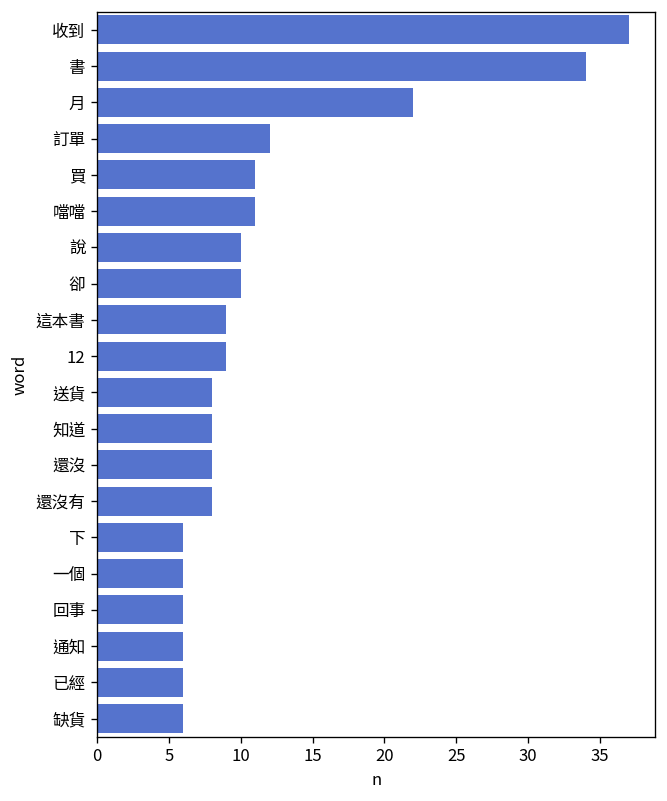

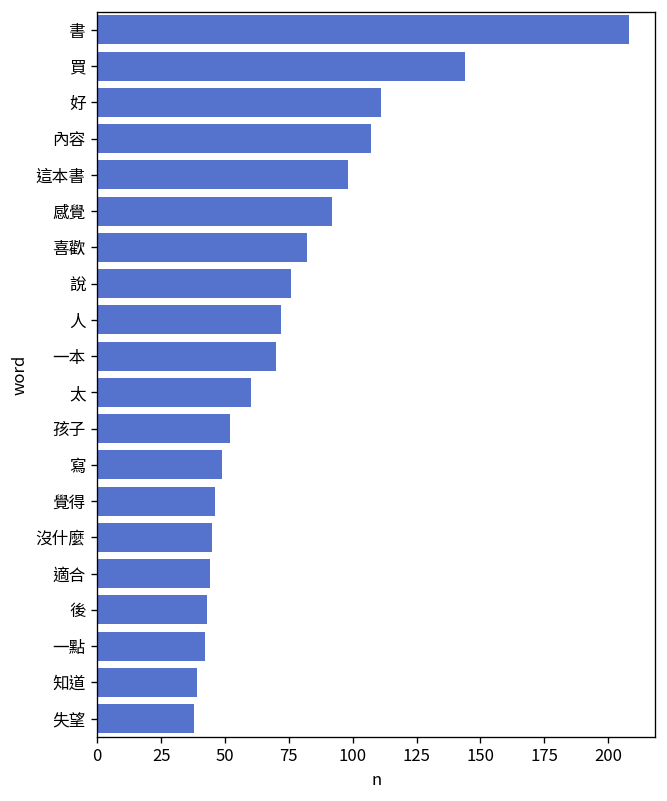

<Figure size 720x960 with 0 Axes>

In [ ]:
import seaborn as sns
for clu in range(len(clu_counter)):
    df1 = pd.DataFrame(list(cdict[clu].most_common(20)), columns = ['word', 'n'])
    plt.figure(figsize=(6, 8), dpi=120) 
    df_data = df1.sort_values('n', ascending=False)
#     print(df_data)
    sns.barplot(x='n', 
                y='word', 
                data=df_data, 
                label='word', 
                color='royalblue',
               )